In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
num_pretrain_entities = np.load("num_pretrain_entities/wikiplots_test_points.npy")
num_entities_bins = np.array([0, 400, 800, 1200, 1600, 2000, np.inf])

In [3]:
def get_factscore_info(factscores):
    num_true_all = []
    num_total_all = []
    frac_correct_facts = []
    for i in range(len(factscores["decisions"])):
        decison = factscores["decisions"][i]
        if decison == None:
            num_total_all.append(0)
            num_true_all.append(0)
            frac_correct_facts.append(0)
            print("None")
        else:
            num_total_all.append(len(decison))
            num_true_all.append(np.sum([fact["is_supported"] for fact in decison]))
            frac_correct_facts.append(np.sum([fact["is_supported"] for fact in decison])/len(decison))
    num_total_all = np.array(num_total_all)
    num_true_all = np.array(num_true_all)
    frac_correct_facts = np.array(frac_correct_facts)
    num_false_all = num_total_all - num_true_all
    return num_total_all, num_true_all, num_false_all, frac_correct_facts

In [4]:
with open("ckpts/sft_wikiplots_common_llama7B/checkpoint_15000/hf_model/factscores_test_medium.json") as f:
    factscores1 = json.load(f)

sft_num_total_all, sft_num_true_all, sft_num_false_all, sft_frac_correct_facts = get_factscore_info(factscores1)

None
None
None
None


In [7]:
np.mean(sft_frac_correct_facts)

0.45399557515824457

In [5]:
with open("ckpts/ppo_rm_wikiplots_llama7B_true2_false-3_kl0pt5/checkpoint_030000/hf_model/factscores_eval.json") as f:
    factscores2 = json.load(f)

ppo_num_total_all, ppo_num_true_all, ppo_num_false_all, ppo_frac_correct_facts = get_factscore_info(factscores2)

None
None
None
None
None
None


In [8]:
np.mean(ppo_frac_correct_facts)

0.8020769426992208

In [6]:
with open("ckpts/ppo_rm_GPT3pt5_wikiplots_llama7B_true2_false-3_kl0pt5/checkpoint_015000/hf_model/factscores_eval.json") as f:
    factscores3 = json.load(f)

ppo_num_total_all2, ppo_num_true_all2, ppo_num_false_all2, ppo_frac_correct_facts2 = get_factscore_info(factscores3)

None
None
None
None
None
None


In [10]:
np.mean(ppo_frac_correct_facts2)

0.5374206321291213

In [7]:
def get_bin_mean(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        # print(len(idxs))
        bin_avgs.append(np.mean(y_axis[idxs]))
    return np.array(bin_avgs)

def get_bin_median(x_axis, y_axis, bins):
    x_axis = np.array(x_axis)
    y_axis = np.array(y_axis)
    bin_avgs = []
    for i in range(len(bins)-1):
        idxs = np.where((x_axis >= bins[i]) & (x_axis < bins[i+1]))[0]
        bin_avgs.append(np.median(y_axis[idxs]))
    return np.array(bin_avgs)

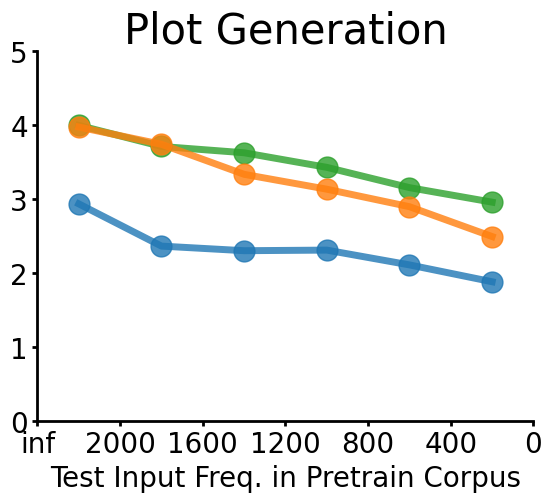

In [15]:
x= np.arange(0, len(num_entities_bins)-1, 1)

sft_bin_avgs = np.flip(get_bin_mean(num_pretrain_entities, sft_num_true_all, num_entities_bins))
ppo_bin_avgs = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_true_all, num_entities_bins))
ppo_bin_avgs2 = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_true_all2, num_entities_bins))
plt.plot(x, sft_bin_avgs, "o-", label="SFT", markersize=15, linewidth=5, alpha=0.8)
plt.plot(x, ppo_bin_avgs, "o-",label="PPO", markersize=15, linewidth=5, alpha=0.8, color = "C2")
plt.plot(x, ppo_bin_avgs2, "o-",label="PPO + GPT3", markersize=15, linewidth=5, alpha=0.8, color="C1")

plt.ylim(0, 5)

plt.yticks(fontsize=20)
plt.xlabel("Test Input Freq. in Pretrain Corpus", fontsize=20)
# plt.ylabel("Number of True Facts", fontsize=20)
plt.xticks(np.append(x,len(num_entities_bins)-1 )-0.5, ["inf", 2000, 1600, 1200, 800, 400, 0], fontsize=20)

#make spines thicker
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2)

#remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title("Plot Generation", fontsize=30)
plt.savefig("delete.jpg")

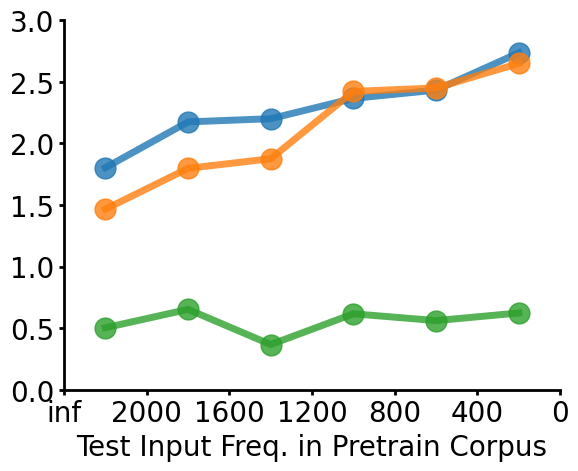

In [16]:
x= np.arange(0, len(num_entities_bins)-1, 1)

sft_bin_avgs = np.flip(get_bin_mean(num_pretrain_entities, sft_num_false_all, num_entities_bins))
ppo_bin_avgs = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_false_all, num_entities_bins))
ppo_bin_avgs2 = np.flip(get_bin_mean(num_pretrain_entities, ppo_num_false_all2, num_entities_bins))
plt.plot(x, sft_bin_avgs, "o-", label="SFT", markersize=15, linewidth=5, alpha=0.8)
plt.plot(x, ppo_bin_avgs, "o-",label="PPO", markersize=15, linewidth=5, alpha=0.8, color = "C2")
plt.plot(x, ppo_bin_avgs2, "o-",label="PPO + GPT3", markersize=15, linewidth=5, alpha=0.8)

plt.ylim(0, 3)

plt.yticks(fontsize=20)
plt.xticks(np.append(x,len(num_entities_bins)-1 )-0.5, ["inf", 2000, 1600, 1200, 800, 400, 0], fontsize=20)
# plt.ylabel("Number of False Facts", fontsize=20)
plt.xlabel("Test Input Freq. in Pretrain Corpus", fontsize=20)

#make spines thicker
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
plt.tick_params(axis='both', which='major', width=2)

#remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.title("Plot Generation", fontsize=20)
plt.savefig("delete.jpg")

In [10]:
ppo_bin_avgs

array([0.63410853, 0.59448819, 0.6       , 0.5042735 , 0.67010309,
       0.49726776])

In [18]:
sft_generations = np.load("ckpts/sft_wikiplots_common_llama7B/checkpoint_15000/hf_model/sample_output_strings_eval_medium.npy")
ppo_generations = np.load("ckpts/ppo_rm_wikiplots_llama7B_true2_false-3_kl0pt5/checkpoint_030000/hf_model/sample_output_strings_eval_medium.npy")
titles = []
with open("/data/katie_kang/trlx/examples/movies/titles",) as file:
    for line in file:
        titles.append(line.strip())

plots = []
line_idx = 0
with open("/data/katie_kang/trlx/examples/movies/plots",) as file:
    for line in file:
        line_idx+=1
        if line_idx == 1:
            plots.append(line.rstrip())
        if "<EOS>" in line:
            line_idx = 0
    
titles = np.array(titles)
plots = np.array(plots)

test_idxs = np.load("/data/katie_kang/trlx/examples/movies/common_test_medium_idxs.npy")

for i in np.where((np.array(num_pretrain_entities)>5000))[0]:
    print(titles[test_idxs[i]])
    print(plots[test_idxs[i]])
    print("\n")
    decision = factscores1["decisions"][i]
    print("SFT")
    print(sft_generations[i].split("Answer: ")[-1])
    for fact in decision:
        print(fact["is_supported"], fact["atom"])

    decision = factscores2["decisions"][i]
    print("\nPPO")
    print(ppo_generations[i].split("Answer: ")[-1])
    for fact in decision:
        print(fact["is_supported"], fact["atom"])
    print("\n\n")

Home Alone
The McCallister family is preparing to spend Christmas in Paris, gathering at Peter and Kate's home outside of Chicago on the night before their departure.


SFT
In 1990, the McCallister family is preparing for a Christmas vacation to Paris, France.
True In 1990, the McCallister family is preparing for a Christmas vacation.
True The McCallister family is going to Paris, France.

PPO
Kevin McCallister (Macaulay Culkin) is an eight-year-old boy who is accidentally left behind when his family goes on Christmas vacation to Paris, France.
True Kevin McCallister is an eight-year-old boy.
True Kevin McCallister's family goes on Christmas vacation.
True Kevin McCallister's family goes on Christmas vacation to Paris, France.
True Kevin McCallister is accidentally left behind.
True Kevin McCallister's family leaves for Paris, France without him.



The Frog Prince
In the tale, a spoiled princess reluctantly befriends the Frog Prince (meeting him after dropping a gold ball into a pond)

In [17]:
np.where((np.array(num_pretrain_entities)>5000))[0]

array([   0,   22,   41,   48,   52,   62,   75,   88,  118,  136,  137,
        139,  151,  158,  207,  217,  233,  236,  243,  295,  309,  364,
        388,  419,  432,  436,  471,  481,  502,  521,  543,  545,  552,
        553,  608,  624,  639,  659,  673,  708,  718,  734,  747,  749,
        762,  781,  814,  847,  876,  887,  926,  978, 1008, 1062, 1073,
       1141, 1179, 1189, 1218, 1231, 1235, 1247, 1285, 1301, 1303, 1308,
       1333, 1352, 1354, 1364, 1414, 1424, 1450, 1459, 1475, 1477, 1496,
       1516, 1529, 1539, 1540, 1646, 1656, 1665, 1690, 1694, 1709, 1731,
       1738, 1745, 1757, 1779, 1788, 1797, 1813, 1828, 1832, 1841, 1852,
       1885, 1888, 1899, 1906, 1929, 1985, 1991, 2031, 2037, 2067, 2076,
       2083, 2096, 2097, 2108, 2130, 2135, 2155, 2172, 2173, 2179, 2183,
       2241, 2247, 2255, 2276, 2277, 2283, 2284, 2346, 2363, 2415, 2473,
       2484, 2584, 2587, 2594, 2620, 2687, 2704, 2714, 2715, 2716, 2726,
       2730, 2740, 2755, 2818, 2826, 2843, 2847, 28

In [84]:
i = 3790
print(titles[test_idxs[i]])
print(plots[test_idxs[i]])
print("\n")
decision = factscores1["decisions"][i]
print("SFT")
print(sft_generations[i].split("Answer: ")[-1])
for fact in decision:
    print(fact["is_supported"], fact["atom"])

decision = factscores2["decisions"][i]
print("\nPPO")
print(ppo_generations[i].split("Answer: ")[-1])
for fact in decision:
    print(fact["is_supported"], fact["atom"])
print("\n\n")

The Matrix
Trinity, an infamous hacker, is cornered by police in an abandoned hotel.


SFT
In the year 1999, a computer hacker named Neo (Keanu Reeves) is contacted by a mysterious man named Morpheus (Laurence Fishburne) who offers him the chance to unplug from the Matrix, a simulated reality created by intelligent machines to keep humans oblivious to their enslavement.
True In the year 1999, a computer hacker named Neo is contacted by a mysterious man named Morpheus.
True Neo is a computer hacker.
True Neo is contacted by Morpheus.
True Morpheus offers Neo the chance to unplug from the Matrix.
True The Matrix is a simulated reality.
True The Matrix was created by intelligent machines.
True The Matrix was created to keep humans oblivious to their enslavement.

PPO
In the year 1999, humans live in a simulated reality, the Matrix, created by intelligent machines to distract humans from the truth: their bodies' energy is used as a source of energy for the machines, which have taken over t

In [68]:
np.where(np.array(num_pretrain_entities)==3)

(array([1410, 1504, 2059, 2552, 2869, 3306, 3775, 4073, 4110, 4183, 4685]),)

In [78]:
i = 4183
print(titles[test_idxs[i]])
print(plots[test_idxs[i]])
print("\n")
decision = factscores1["decisions"][i]
print("SFT")
print(sft_generations[i].split("Answer: ")[-1])
for fact in decision:
    print(fact["is_supported"], fact["atom"])

decision = factscores2["decisions"][i]
print("\nPPO")
print(ppo_generations[i].split("Answer: ")[-1])
for fact in decision:
    print(fact["is_supported"], fact["atom"])
print("\n\n")

Cannonball Run II
Having lost the first Cannonball Run race, Sheik Abdul ben Falafel (Jamie Farr) is ordered by his father (Ricardo Montalban) to go back to America and win another Cannonball Run in order to "emblazon the Falafel name as the fastest in the world".


SFT
The film begins with a brief recap of the events of the first film, with the death of Jenson (Jerry Reed) and the arrest of Jackie (Burt Reynolds).
False The film begins with a recap of the events of the first film.
False The recap includes the death of Jenson (Jerry Reed).
False The recap includes the arrest of Jackie (Burt Reynolds).

PPO
The Cannonball Run II is a cross-country car race.
True The Cannonball Run II is a movie.
True The Cannonball Run II is a cross-country car race.





In [79]:
# i = 551
# print(titles[test_idxs[i]])
# print(plots[test_idxs[i]])
# print("\n")
# decision = factscores1["decisions"][i]
# print("SFT")
# print(sft_generations[i].split("Answer: ")[-1])
# for fact in decision:
#     print(fact["is_supported"], fact["atom"])

# decision = factscores2["decisions"][i]
# print("\nPPO")
# print(ppo_generations[i].split("Answer: ")[-1])
# for fact in decision:
#     print(fact["is_supported"], fact["atom"])
# print("\n\n")

In [ ]:
# Permanent Midnight
# Approaching the end of a drug rehabilitation program, Jerry Stahl (Stiller) quits his job at a fast food restaurant on an impulse when an attractive woman named Kitty (Bello) pulls up at the drive-through window.


# SFT
# Jerry Stahl (Ben Stiller) is a successful screenwriter who has just completed a script for a major studio.
# True Jerry Stahl is a screenwriter.
# True Jerry Stahl is a successful screenwriter.
# False Jerry Stahl has completed a script.
# False The script is for a major studio.
# False The script is for a major studio and has been completed by Jerry Stahl.

# PPO
# Permanent Midnight is a biographical film about the life of writer Jerry Stahl.
# True Permanent Midnight is a film.
# True Permanent Midnight is a biographical film.
# True Permanent Midnight is about the life of writer Jerry Stahl.

In [19]:
num_pretrain_entities[np.where(titles[test_idxs] == "Home Alone")[0][0]]

14653

In [ ]:
# Love (2015 film)
# The film revolves around the lives of an American cinema school student, named Murphy, and his former French girlfriend, Electra, whom he dated for two years while living in Paris.


# SFT
# The film begins with a young man, Raghu (Ravi Teja), who is a happy-go-lucky guy.
# True The film begins.
# True The film begins with a young man.
# False The young man's name is Raghu.
# False Raghu is a happy-go-lucky guy.

# PPO
# Love is a story of love.
# True Love is a story.
# True Love is a story of love.

In [18]:
num_pretrain_entities[np.where(titles[test_idxs] == "Love (2015 film)")[0][0]]

-1

In [ ]:
# Spy Kids: All the Time in the World
# OSS agent Marissa Wilson (Jessica Alba) is attempting to capture a criminal named Tick Tock (Jeremy Piven), who purchases a mini-disk stolen from OSS.


# SFT
# Carmen and Juni Cortez are now teenagers and are enjoying their summer vacation in Hawaii.
# True Carmen and Juni Cortez are siblings.
# False Carmen and Juni Cortez are now teenagers.
# False Carmen and Juni Cortez are enjoying their summer vacation.
# False Their summer vacation is in Hawaii.

# PPO
# Spy Kids: All the Time in the World is the fourth film in the Spy Kids series.
# True Spy Kids: All the Time in the World is a film.
# True Spy Kids: All the Time in the World is the fourth film in the Spy Kids series.

In [51]:
num_pretrain_entities[np.where(titles[test_idxs] == "Spy Kids: All the Time in the World")[0][0]]

-1

In [ ]:

# Girl, Interrupted (film)
# The story surrounds 18-year-old Susanna Kaysen (Winona Ryder) who has a nervous breakdown and takes an overdose of pills with a bottle of vodka.


# SFT
# Susanna Kaysen (Winona Ryder) is a 19-year-old woman who is admitted to Claymoore, a psychiatric hospital in the 1960s.
# True The main character is named Susanna Kaysen.
# False Susanna Kaysen is 19 years old.
# True Susanna Kaysen is a woman.
# True Susanna Kaysen is admitted to Claymoore.
# True Claymoore is a psychiatric hospital.
# True The story takes place in the 1960s.

# PPO
# Susanna Kaysen (Winona Ryder) is a young woman who is admitted to Claymoore, a psychiatric hospital, after attempting suicide.
# True Susanna Kaysen is a young woman.
# True Susanna Kaysen is admitted to Claymoore.
# True Claymoore is a psychiatric hospital.
# True Susanna Kaysen attempted suicide.


In [ ]:

# Bodyguard (2011 Hindi film)
# Lovely Singh (Salman Khan) is assigned as Divya's (Kareena Kapoor) bodyguard to protect her from goons hunting her to take revenge against her father, a kind and successful politician.


# SFT
# The film begins with a young man, Ravi (Siddharth), who is a bodyguard to a rich businessman, Vijay (Suman).
# False The film begins.
# False The film features a young man named Ravi.
# False Ravi is a bodyguard.
# False Ravi is a bodyguard to a rich businessman.
# False The rich businessman's name is Vijay.
# False Vijay is played by Suman.

# PPO
# The film is about a bodyguard.
# True The film is about a bodyguard.

In [53]:

num_pretrain_entities[np.where(titles[test_idxs] == "Bodyguard (2011 Hindi film)")[0][0]]

-1

In [47]:
# The Thirty Nine Steps (1978 film)
# In 1914, German spies are everywhere in London.


# SFT
# Richard Hannay (Robert Donat) is a Canadian visitor to London who becomes involved in a spy plot when he returns to his flat one night to find a woman murdered.
# True Richard Hannay is a character.
# False Richard Hannay is a Canadian.
# True Richard Hannay is a visitor to London.
# True Richard Hannay becomes involved in a spy plot.
# True Richard Hannay returns to his flat one night.
# False Richard Hannay finds a woman murdered.

# PPO
# Richard Hannay, a British man living in London, becomes involved in a spy plot when a man is murdered in his flat.
# True Richard Hannay is a British man.
# True Richard Hannay lives in London.
# True Richard Hannay becomes involved in a spy plot.
# True A man is murdered in Richard Hannay's flat.

In [25]:
num_pretrain_entities[np.where(titles[test_idxs] == "The Thirty Nine Steps (1978 film)")[0][0]]

-1

In [ ]:
# A Better Life
# Carlos Galindo (Demián Bichir) works as a gardener with Blasco Martinez (Joaquín Cosio) in Los Angeles, California.


# SFT
# Carlos Galindo (Demian Bichir) is a gardener who lives in a trailer park in East Los Angeles with his son, Luis (Jimmy Smitz).
# True Carlos Galindo is a gardener.
# False Carlos Galindo lives in a trailer park in East Los Angeles.
# True Carlos Galindo has a son named Luis.
# True Luis is the son of Carlos Galindo.
# True Carlos Galindo and Luis live together in the trailer park.
# True Demian Bichir portrays Carlos Galindo in the movie.
# False Jimmy Smitz portrays Luis in the movie.

# PPO
# A Better Life is a drama film about a Mexican immigrant who works as a gardener in Los Angeles, California, and struggles to provide a better life for his son.
# True A Better Life is a drama film.
# True The film is about a Mexican immigrant.
# True The immigrant works as a gardener.
# True The gardener works in Los Angeles, California.
# True The gardener struggles to provide a better life.
# True The better life is for his son.

In [80]:
num_pretrain_entities[np.where(titles[test_idxs] == "A Better Life")[0][0]]

262

In [ ]:
# Canadian Bacon
# Thousands of former employees are outraged with military businessmanJ.


# SFT
# The film opens with a montage of news clips of the United States's economic woes, including the closing of a factory in Detroit, Michigan, and the laying off of workers.
# True The film opens with a montage of news clips.
# False The montage includes news clips of the United States's economic woes.
# False The United States's economic woes include the closing of a factory in Detroit, Michigan.
# True The United States's economic woes include the laying off of workers.

# PPO
# The film is a satire of American politics and foreign policy.
# True The film is a satire.
# True The film is a satire of American politics.
# True The film is a satire of foreign policy.
# True The film is a satire of American politics and foreign policy.

In [20]:
num_pretrain_entities[np.where(titles[test_idxs] == "Canadian Bacon")[0][0]]

1825

In [ ]:
# Alice's Adventures in Wonderland
# Chapter One – Down the Rabbit Hole: Alice is feeling bored and drowsy while sitting on the riverbank with her older sister, who is reading a book with no pictures or conversations.


# SFT
# The story is set in Victorian England and is narrated in the first person by a girl named Alice who falls down a rabbit hole while following a white rabbit.
# True The story is set in Victorian England.
# True The story is narrated in the first person.
# True The story is narrated by a girl named Alice.
# True Alice falls down a rabbit hole.
# True Alice is following a white rabbit.

# PPO
# Alice's Adventures in Wonderland is a fantasy story about a young girl named Alice who falls through a rabbit hole into a fantasy world full of peculiar, anthropomorphic creatures.
# True Alice's Adventures in Wonderland is a fantasy story.
# True The story is about a young girl named Alice.
# True Alice falls through a rabbit hole.
# True The rabbit hole leads to a fantasy world.
# True The fantasy world is full of peculiar creatures.
# True The creatures are anthropomorphic, meaning they have human-like qualities.

In [81]:
num_pretrain_entities[np.where(titles[test_idxs] == "Alice's Adventures in Wonderland")[0][0]]

-1